---

_You are currently looking at **version 1.2** of this notebook. To download notebooks and datafiles, as well as get help on Jupyter notebooks in the Coursera platform, visit the [Jupyter Notebook FAQ](https://www.coursera.org/learn/python-data-analysis/resources/0dhYG) course resource._

---

# Assignment 3 - More Pandas
All questions are weighted the same in this assignment. This assignment requires more individual learning then the last one did - you are encouraged to check out the [pandas documentation](http://pandas.pydata.org/pandas-docs/stable/) to find functions or methods you might not have used yet, or ask questions on [Stack Overflow](http://stackoverflow.com/) and tag them as pandas and python related. And of course, the discussion forums are open for interaction with your peers and the course staff.

### Question 1 (20%)
Load the energy data from the file `Energy Indicators.xls`, which is a list of indicators of [energy supply and renewable electricity production](Energy%20Indicators.xls) from the [United Nations](http://unstats.un.org/unsd/environment/excel_file_tables/2013/Energy%20Indicators.xls) for the year 2013, and should be put into a DataFrame with the variable name of **energy**.

Keep in mind that this is an Excel file, and not a comma separated values file. Also, make sure to exclude the footer and header information from the datafile. The first two columns are unneccessary, so you should get rid of them, and you should change the column labels so that the columns are:

`['Country', 'Energy Supply', 'Energy Supply per Capita', '% Renewable's]`

Convert `Energy Supply` to gigajoules (there are 1,000,000 gigajoules in a petajoule). For all countries which have missing data (e.g. data with "...") make sure this is reflected as `np.NaN` values.

Rename the following list of countries (for use in later questions):

```"Republic of Korea": "South Korea",
"United States of America": "United States",
"United Kingdom of Great Britain and Northern Ireland": "United Kingdom",
"China, Hong Kong Special Administrative Region": "Hong Kong"```

There are also several countries with parenthesis in their name. Be sure to remove these, e.g. `'Bolivia (Plurinational State of)'` should be `'Bolivia'`.

<br>

Next, load the GDP data from the file `world_bank.csv`, which is a csv containing countries' GDP from 1960 to 2015 from [World Bank](http://data.worldbank.org/indicator/NY.GDP.MKTP.CD). Call this DataFrame **GDP**. 

Make sure to skip the header, and rename the following list of countries:

```"Korea, Rep.": "South Korea", 
"Iran, Islamic Rep.": "Iran",
"Hong Kong SAR, China": "Hong Kong"```

<br>

Finally, load the [Sciamgo Journal and Country Rank data for Energy Engineering and Power Technology](http://www.scimagojr.com/countryrank.php?category=2102) from the file `scimagojr-3.xlsx`, which ranks countries based on their journal contributions in the aforementioned area. Call this DataFrame **ScimEn**.

Join the three datasets: GDP, Energy, and ScimEn into a new dataset (using the intersection of country names). Use only the last 10 years (2006-2015) of GDP data and only the top 15 countries by Scimagojr 'Rank' (Rank 1 through 15). 

The index of this DataFrame should be the name of the country, and the columns should be ['Rank', 'Documents', 'Citable documents', 'Citations', 'Self-citations',
       'Citations per document', 'H index', 'Energy Supply',
       'Energy Supply per Capita', '% Renewable', '2006', '2007', '2008',
       '2009', '2010', '2011', '2012', '2013', '2014', '2015'].

*This function should return a DataFrame with 20 columns and 15 entries.*

In [29]:
import numpy as np
import pandas as pd

def answer_one():

    # read in xls file skipping header and assigning '...' with nan
    energy = pd.read_excel('Energy Indicators.xls', skiprows=17, skip_footer=38, na_values='...')
    # dropping first 2 columns
    energy.drop(['Unnamed: 0', 'Unnamed: 2'], axis=1, inplace=True)
    # renaming columns
    energy.columns = ['Country', 'Energy Supply', 'Energy Supply per Capita', '% Renewable']
    # converting energy supply to giga
    energy['Energy Supply'] = energy['Energy Supply'] * 1000000
    # replace country names
    energy.replace(to_replace={'Country':{"Republic of Korea": "South Korea",
                                        "United States of America": "United States",
                                        "United Kingdom of Great Britain and Northern Ireland": "United Kingdom",
                                        "China, Hong Kong Special Administrative Region": "Hong Kong"}
                              }, inplace=True)
    # remove country names with parentheses
    energy.replace(to_replace={'Country':{'\s\(.+\)':''}}, regex=True, inplace=True)

    # read world bank csv
    GDP = pd.read_csv('world_bank.csv', skiprows=4)
    # replace country names
    GDP.replace(to_replace={'Country Name':{"Korea, Rep.": "South Korea", 
                            "Iran, Islamic Rep.": "Iran",
                            "Hong Kong SAR, China": "Hong Kong"}}, inplace=True)
    # read rank data
    ScimEn = pd.read_excel('scimagojr-3.xlsx')

    # merge energy and scien
    df = pd.merge(left=energy, right=ScimEn.iloc[:15,:], left_on='Country', right_on='Country', how='right')
    # merge merged df and GDP
    df = pd.merge(left=df, right=GDP, left_on='Country', right_on='Country Name', how='left')
    # sort df by rank 
    df.sort_values(by='Rank', inplace=True)
    # subset data frame
    df = df.loc[:,['Country','Rank', 'Documents', 'Citable documents', 'Citations', 'Self-citations', 
              'Citations per document', 'H index', 'Energy Supply', 'Energy Supply per Capita', 
              '% Renewable', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015']].copy()
    # set country as index
    df.set_index('Country', inplace=True)
    return df



### Question 2 (6.6%)
The previous question joined three datasets then reduced this to just the top 15 entries. When you joined the datasets, but before you reduced this to the top 15 items, how many entries did you lose?

*This function should return a single number.*

In [30]:
%%HTML
<svg width="800" height="300">
  <circle cx="150" cy="180" r="80" fill-opacity="0.2" stroke="black" stroke-width="2" fill="blue" />
  <circle cx="200" cy="100" r="80" fill-opacity="0.2" stroke="black" stroke-width="2" fill="red" />
  <circle cx="100" cy="100" r="80" fill-opacity="0.2" stroke="black" stroke-width="2" fill="green" />
  <line x1="150" y1="125" x2="300" y2="150" stroke="black" stroke-width="2" fill="black" stroke-dasharray="5,3"/>
  <text  x="300" y="165" font-family="Verdana" font-size="35">Everything but this!</text>
</svg>

In [31]:
def answer_two():
    
    # read in xls file skipping header and assigning '...' with nan
    energy = pd.read_excel('Energy Indicators.xls', skiprows=17, skip_footer=38, na_values='...')
    # dropping first 2 columns
    energy.drop(['Unnamed: 0', 'Unnamed: 2'], axis=1, inplace=True)
    # renaming columns
    energy.columns = ['Country', 'Energy Supply', 'Energy Supply per Capita', '% Renewable']
    # converting energy supply to giga
    energy['Energy Supply'] = energy['Energy Supply'] * 1000000
    # replace country names
    energy.replace(to_replace={'Country':{"Republic of Korea": "South Korea",
                                        "United States of America": "United States",
                                        "United Kingdom of Great Britain and Northern Ireland": "United Kingdom",
                                        "China, Hong Kong Special Administrative Region": "Hong Kong"}
                              }, inplace=True)
    # remove country names with parentheses
    energy.replace(to_replace={'Country':{'\s\(.+\)':''}}, regex=True, inplace=True)

    # read world bank csv
    GDP = pd.read_csv('world_bank.csv', skiprows=4)
    # replace country names
    GDP.replace(to_replace={'Country Name':{"Korea, Rep.": "South Korea", 
                            "Iran, Islamic Rep.": "Iran",
                            "Hong Kong SAR, China": "Hong Kong"}}, inplace=True)
    # read rank data
    ScimEn = pd.read_excel('scimagojr-3.xlsx')
    return len(energy) + len(GDP) + len(ScimEn)

667

### Question 3 (6.6%)
What are the top 15 countries for average GDP over the last 10 years?

*This function should return a Series named `avgGDP` with 15 countries and their average GDP sorted in descending order.*

In [32]:
def answer_three():
    Top15 = answer_one()
    return (Top15.loc[:,'2006':'2015']
 .apply(np.mean, axis=1)
 .sort_values(ascending=False)
 .rename('avgGDP'))

### Question 4 (6.6%)
By how much had the GDP changed over the 10 year span for the country with the 6th largest average GDP?

*This function should return a single number.*

In [33]:
def answer_four():
    Top15 = answer_one()
    Top15['avgGDP'] = Top15.loc[:,'2006':'2015'].apply(np.mean, axis=1)
    Top15.sort_values(by='avgGDP', inplace=True, ascending=False)
    row = Top15.ix[5,'2006':'2015']
    return row[-1] - row[0]

246702696075.3999

### Question 5 (6.6%)
What is the mean energy supply per capita?

*This function should return a single number.*

In [34]:
def answer_five():
    Top15 = answer_one()
    return Top15['Energy Supply per Capita'].mean()

157.59999999999999

### Question 6 (6.6%)
What country has the maximum % Renewable and what is the percentage?

*This function should return a tuple with the name of the country and the percentage.*

In [35]:
def answer_six():
    Top15 = answer_one()
    country = Top15['% Renewable'].argmax()
    return (country, Top15.loc[country,'% Renewable'])

('Brazil', 69.648030000000006)

### Question 7 (6.6%)
Create a new column that is the ratio of Self-Citations to Total Citations. 
What is the maximum value for this new column, and what country has the highest ratio?

*This function should return a tuple with the name of the country and the ratio.*

In [51]:
def answer_seven():
    Top15 = answer_one()
    Top15['ratio'] = Top15['Self-citations'] / Top15['Citations']
    return (Top15['ratio'].argmax(), Top15['ratio'].max())

('China', 0.68931261793894216)

### Question 8 (6.6%)

Create a column that estimates the population using Energy Supply and Energy Supply per capita. 
What is the third most populous country according to this estimate?

*This function should return a single string value.*

In [38]:
def answer_eight():
    Top15 = answer_one()
    Top15['ratio'] = Top15['Energy Supply'] / Top15['Energy Supply per Capita']
    Top15.sort_values(by='ratio', ascending=False, inplace=True)
    return Top15.index[2]

'United States'

### Question 9 (6.6%)
Create a column that estimates the number of citable documents per person. 
What is the correlation between the number of citable documents per capita and the energy supply per capita?

*This function should return a single number.*

*(Optional: Use the built-in function `plot9()` to visualize the relationship between Energy Supply per Capita vs. Citable docs per Capita).*

In [39]:
def answer_nine():
    Top15 = answer_one()
    Top15['pop'] = Top15['Energy Supply'] / Top15['Energy Supply per Capita']
    Top15['citable doc per person'] = Top15['Citable documents'] / Top15['pop']
    return Top15['Energy Supply per Capita'].corr(Top15['citable doc per person'])

0.79400104354429424

In [40]:
def plot9():
    import matplotlib as plt
    %matplotlib inline
    
    Top15 = answer_one()
    Top15['PopEst'] = Top15['Energy Supply'] / Top15['Energy Supply per Capita']
    Top15['Citable docs per Capita'] = Top15['Citable documents'] / Top15['PopEst']
    Top15.plot(x='Citable docs per Capita', y='Energy Supply per Capita', kind='scatter', xlim=[0, 0.0006])

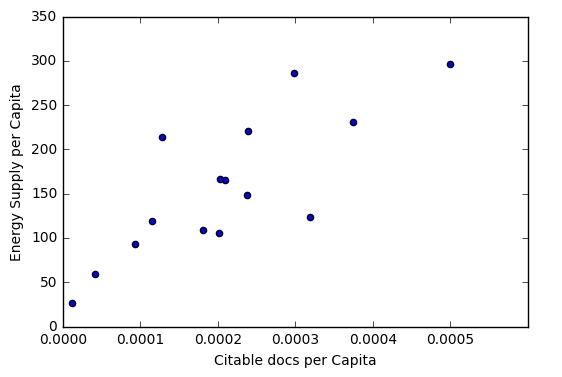

In [41]:
#plot9()

### Question 10 (6.6%)
Create a new column with a 1 if the country's % Renewable value is at or above the median for all countries in the top 15.

*This function should return a series named `HighRenew` whose index is the country name sorted in ascending order of rank.*

In [42]:
def answer_ten():
    Top15 = answer_one()
    Top15['HighRenew'] = np.where(Top15['% Renewable'] >= Top15['% Renewable'].median(), 1, 0)
    Top15.sort_values(by='Rank', inplace=True)
    return Top15.HighRenew

Country
China                 1
United States         0
Japan                 0
United Kingdom        0
Russian Federation    1
Canada                1
Germany               1
India                 0
France                1
South Korea           0
Italy                 1
Spain                 1
Iran                  0
Australia             0
Brazil                1
Name: HighRenew, dtype: int64

### Question 11 (6.6%)
Use the following dictionary to group the Countries by Continent, then create a dateframe that displays the sample size (the number of countries in each continent bin), and the sum, mean, and std deviation for the estimated population of each country.

```python
ContinentDict  = {'China':'Asia', 
                  'United States':'North America', 
                  'Japan':'Asia', 
                  'United Kingdom':'Europe', 
                  'Russian Federation':'Europe', 
                  'Canada':'North America', 
                  'Germany':'Europe', 
                  'India':'Asia',
                  'France':'Europe', 
                  'South Korea':'Asia', 
                  'Italy':'Europe', 
                  'Spain':'Europe', 
                  'Iran':'Asia',
                  'Australia':'Australia', 
                  'Brazil':'South America'}
```

*This function should return a DataFrame with index named Continent `['Asia', 'Australia', 'Europe', 'North America', 'South America']` and columns `['size', 'sum', 'mean', 'std']`*

In [43]:
def answer_eleven():
    ContinentDict  = {'China':'Asia', 
                  'United States':'North America', 
                  'Japan':'Asia', 
                  'United Kingdom':'Europe', 
                  'Russian Federation':'Europe', 
                  'Canada':'North America', 
                  'Germany':'Europe', 
                  'India':'Asia',
                  'France':'Europe', 
                  'South Korea':'Asia', 
                  'Italy':'Europe', 
                  'Spain':'Europe', 
                  'Iran':'Asia',
                  'Australia':'Australia', 
                      'Brazil':'South America'}
    Top15 = answer_one()
    Top15['PopEst'] = Top15['Energy Supply'] / Top15['Energy Supply per Capita']
    Top15['size'], Top15['sum'], Top15['mean'], Top15['std'] = Top15.PopEst,Top15.PopEst,Top15.PopEst,Top15.PopEst
    return Top15.groupby(ContinentDict)['size', 'sum', 'mean', 'std'].agg({'size': len, 'sum': np.sum, 'mean': np.mean, 'std': np.std})

,size,sum,mean,std
Continent,,,,
Asia,5,2.89867e+09,5.79733e+08,6.79098e+08
Australia,1,2.3316e+07,2.3316e+07,NaN
Europe,6,4.5793e+08,7.63216e+07,3.46477e+07
North America,2,3.52855e+08,1.76428e+08,1.9967e+08
South America,1,2.05915e+08,2.05915e+08,NaN


### Question 12 (6.6%)
Cut % Renewable into 5 bins. Group Top15 by the Continent, as well as these new % Renewable bins. How many countries are in each of these groups?

*This function should return a Series with a MultiIndex of `Continent`, then the bins for `% Renewable`. Do not include groups with no countries.*

In [15]:
def answer_twelve():
    Top15 = answer_one()
    Top15['bins for % Renewable'] = pd.cut(Top15['% Renewable'], 5)
    ContinentDict  = {'China':'Asia', 
                      'United States':'North America', 
                      'Japan':'Asia', 
                      'United Kingdom':'Europe', 
                      'Russian Federation':'Europe', 
                      'Canada':'North America', 
                      'Germany':'Europe', 
                      'India':'Asia',
                      'France':'Europe', 
                      'South Korea':'Asia', 
                      'Italy':'Europe', 
                      'Spain':'Europe', 
                      'Iran':'Asia',
                      'Australia':'Australia', 
                      'Brazil':'South America'}

    df = Top15.reset_index()
    df['Continent'] = df['Country'].map(ContinentDict)
    return df.groupby(by=['Continent','bins for % Renewable'])['Country'].count()

### Question 13 (6.6%)
Convert the Population Estimate series to a string with thousands separator (using commas)

e.g. 12345678.90 -> 12,345,678.90

*This function should return a Series `PopEst` whose index is the country name and whose values are the population estimate string.*

In [47]:
def answer_thirteen():
    Top15 = answer_one()
    Top15['PopEst'] = Top15['Energy Supply'] / Top15['Energy Supply per Capita']
    Top15['PopEst'] = Top15['PopEst'].apply(lambda x: '{:,}'.format(x))
    return Top15['PopEst']

Country
China                 1,367,645,161.2903225
United States          317,615,384.61538464
Japan                  127,409,395.97315437
United Kingdom         63,870,967.741935484
Russian Federation            143,500,000.0
Canada                  35,239,864.86486486
Germany                 80,369,696.96969697
India                 1,276,730,769.2307692
France                  63,837,349.39759036
South Korea            49,805,429.864253394
Italy                  59,908,256.880733944
Spain                    46,443,396.2264151
Iran                    77,075,630.25210084
Australia              23,316,017.316017315
Brazil                 205,915,254.23728815
Name: PopEst, dtype: object

### Optional

Use the built in function `plot_optional()` to see an example visualization.

In [48]:
def plot_optional():
    import matplotlib as plt
    %matplotlib inline
    ax = Top15.plot(x='Rank', y='% Renewable', kind='scatter', 
                    c=['#e41a1c','#377eb8','#e41a1c','#4daf4a','#4daf4a','#377eb8','#4daf4a','#e41a1c',
                       '#4daf4a','#e41a1c','#4daf4a','#4daf4a','#e41a1c','#dede00','#ff7f00'], 
                    xticks=range(1,16), s=6*Top15['2014']/10**10, alpha=.75, figsize=[16,6]);

    for i, txt in enumerate(Top15.index):
        ax.annotate(txt, [Top15['Rank'][i], Top15['% Renewable'][i]], ha='center')

    print("This is an example of a visualization that can be created to help understand the data. \
This is a bubble chart showing % Renewable vs. Rank. The size of the bubble corresponds to the countries' \
2014 GDP, and the color corresponds to the continent.")

This is an example of a visualization that can be created to help understand the data. This is a bubble chart showing % Renewable vs. Rank. The size of the bubble corresponds to the countries' 2014 GDP, and the color corresponds to the continent.


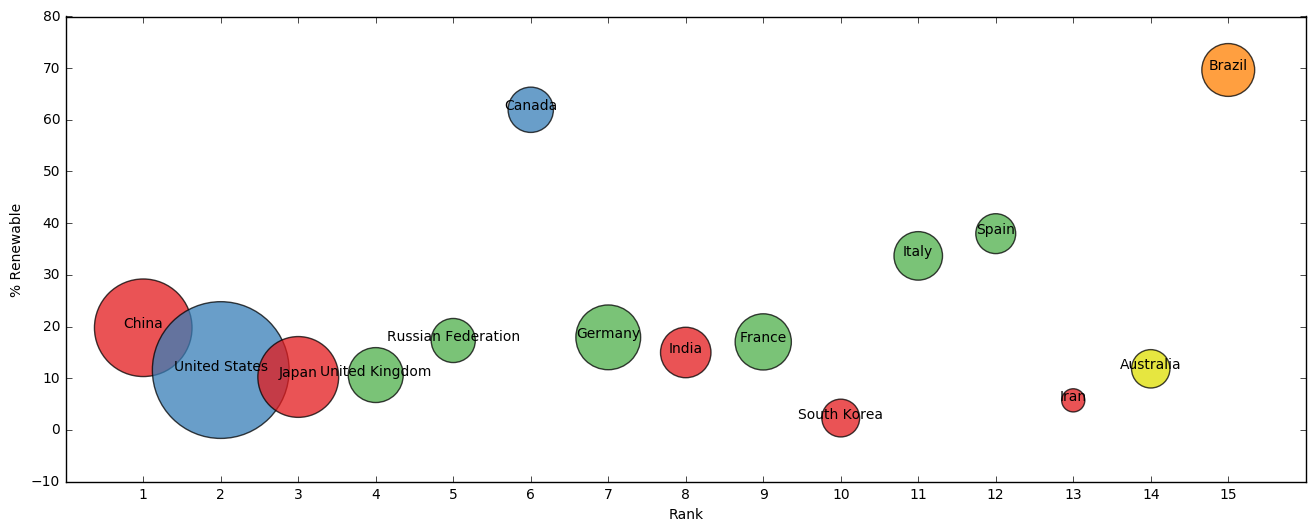

In [49]:
#plot_optional()